## Library

In [2]:
import pandas as pd
import numpy as np 
from ucimlrepo import fetch_ucirepo 


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
#import statsmodels.api as sm

## Analysis 

### Overview
Chronic kidney disease (CKD), or chronic kidney failure, is a disease characterized by gradual damage and loss of function in the kidneys overtime, ultimately resulting in the need for renal replacement therapy (dialysis or transplantation). The dataset contains 400 observations with missing values, across 24 features (11 numeric and 13 nominal before processing) in the following order:
-	age	
-	blood pressure
-	specific gravity
-   albumin
-	sugar
-	red blood cells
-	pus cell
-	pus cell clumps
-	bacteria
-	blood glucose random
-	blood urea
-	serum creatinine
-	sodium
-	potassium
-	hemoglobin
-	packed cell volume
-	white blood cell count
-	red blood cell count
-	hypertension
-	diabetes mellitus
-	coronary artery disease
-	appetite
-	pedal edema
-	anemia

The target is 'classification' with either 'ckd' for chronic kidney disease or 'notckd'. The majority of the numerical column distribution plots show some level of skewness.

### Classification
For this dataset we are trying to predict the whether a patient has CKD based on the listed variables.

In [6]:
data = pd.read_csv('Chronic_Kidney_Disease.csv')
data.shape
data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
data.dtypes
# removing id
data.drop('id', axis = 1, inplace=True)

In [8]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### Preprocessing

In [9]:
categorical = []
numerical = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

/var/folders/nv/d11l8pcj3lq0722m9pkdzyhc0000gp/T/ipykernel_27776/3700275503.py:10: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/lsvo/Downloads/Stats3DA/Stats3DA/A6/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


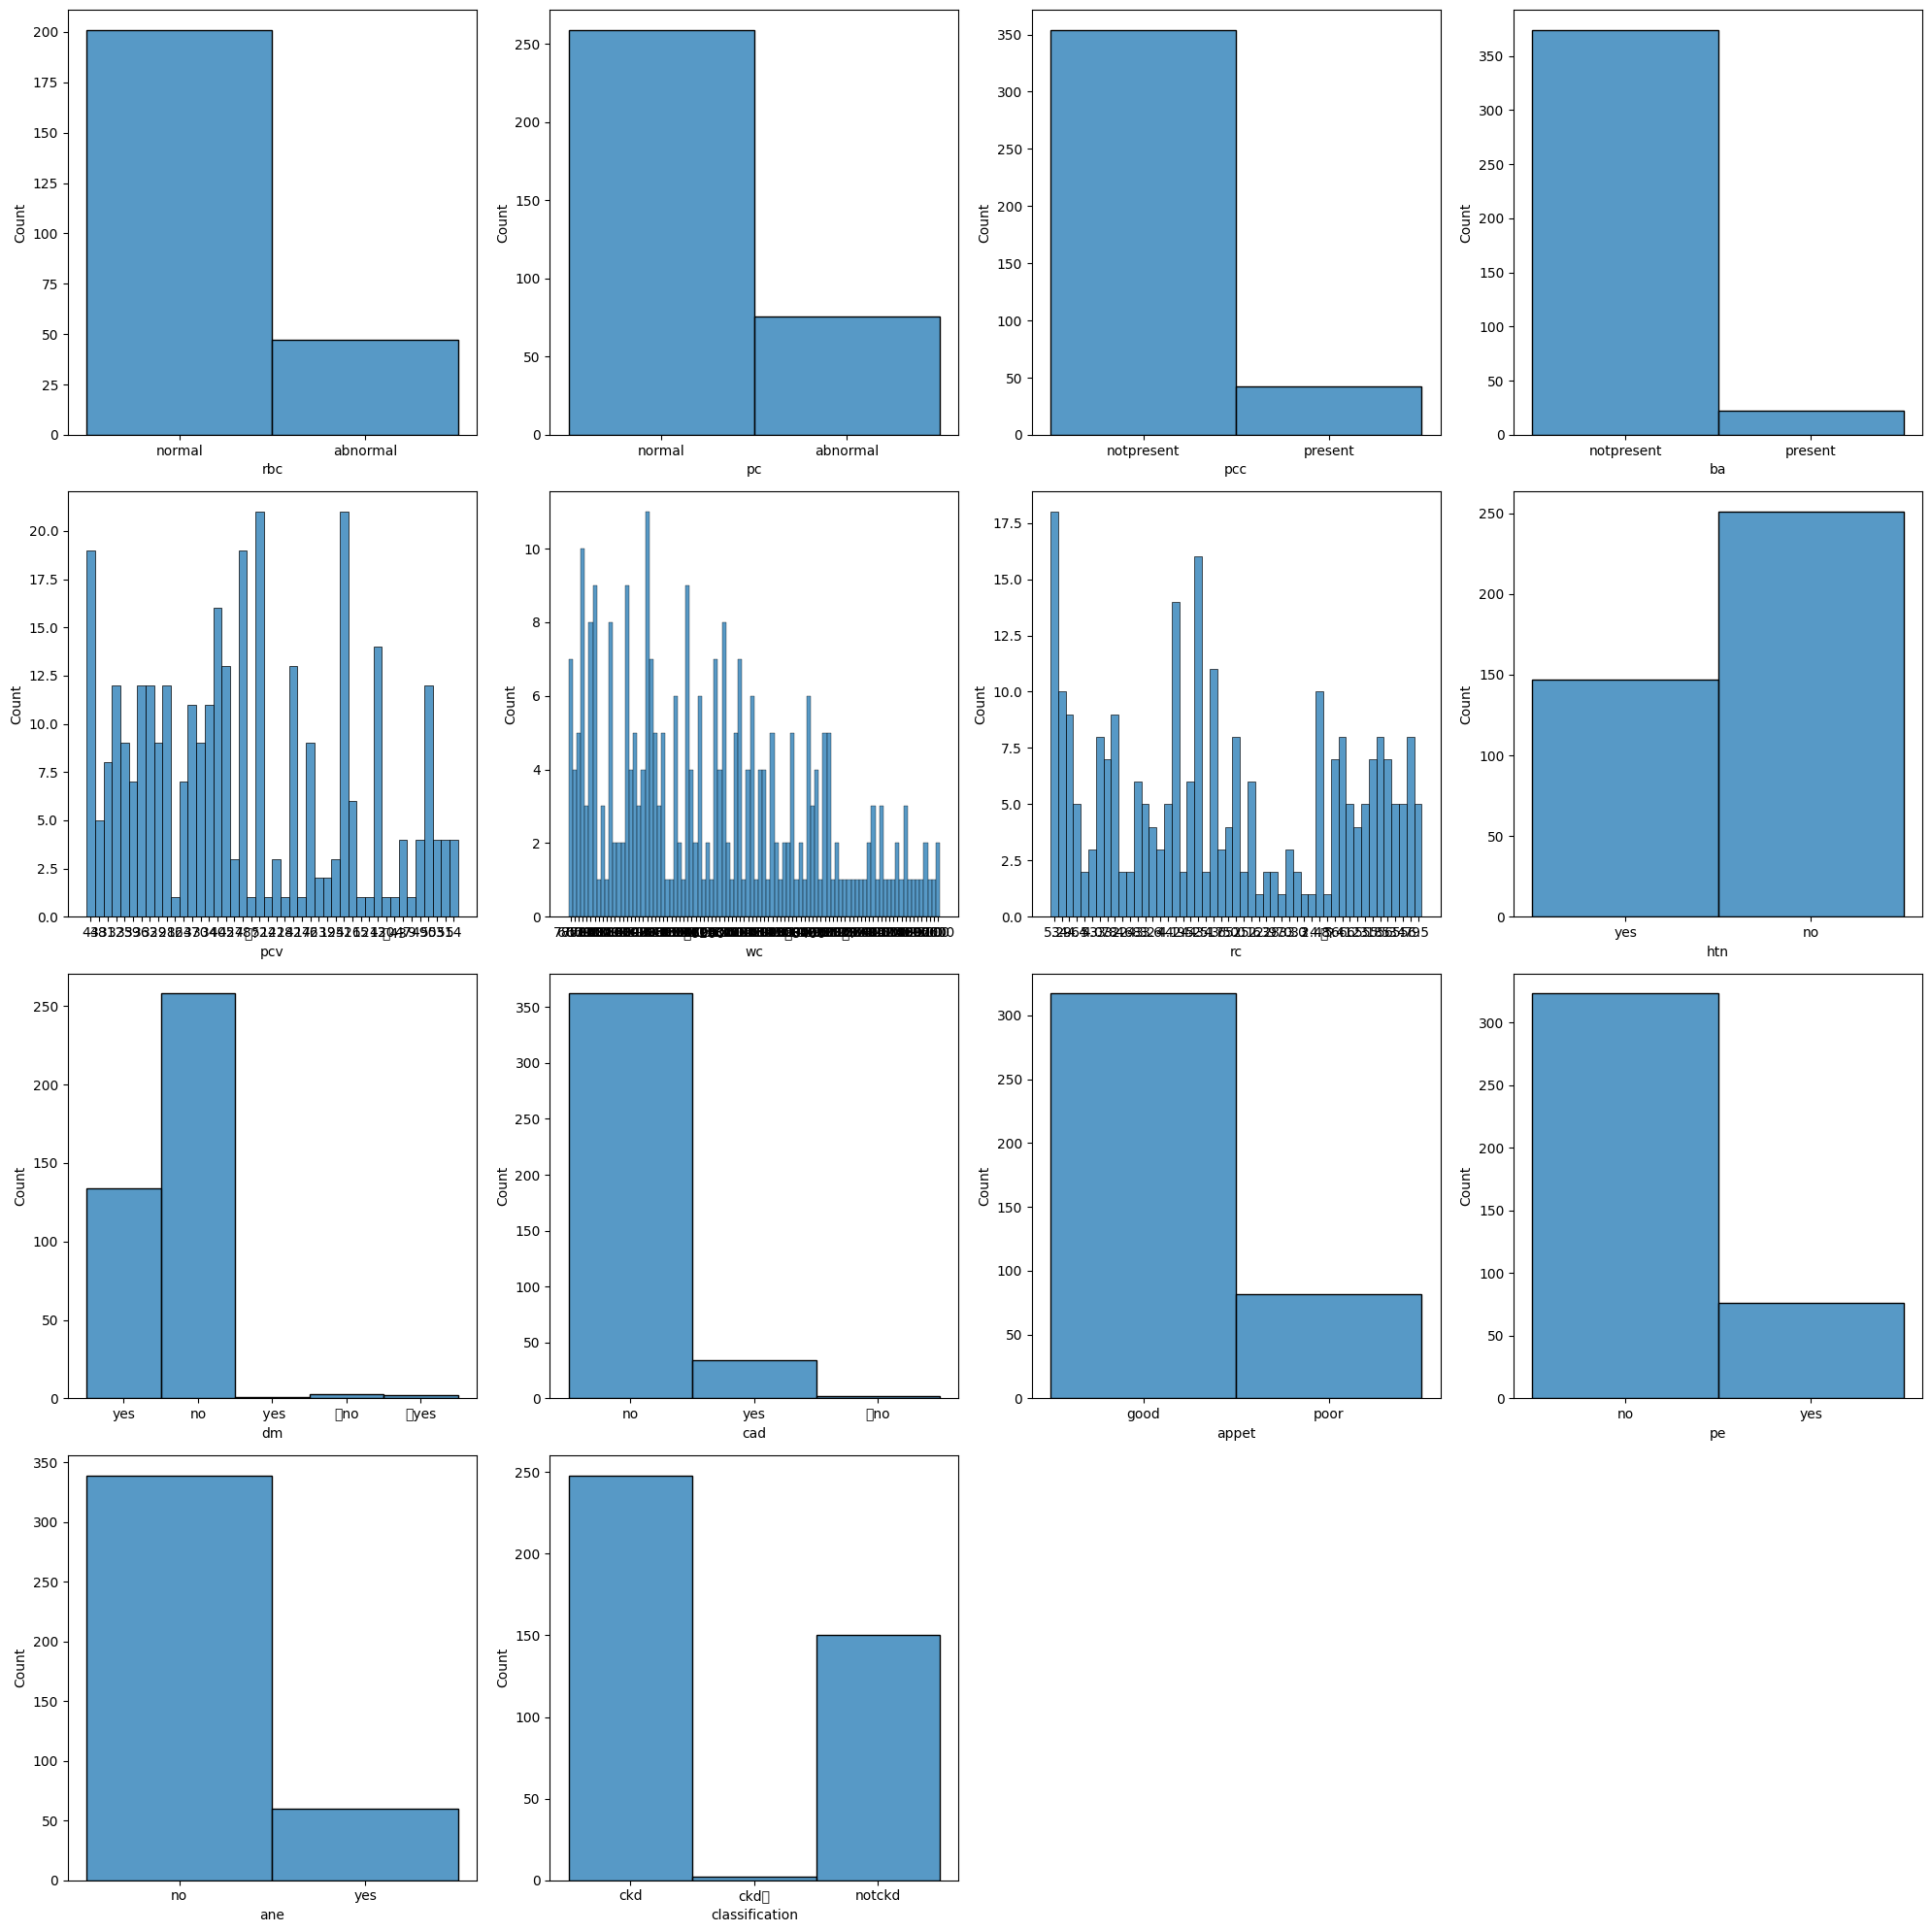

In [10]:
plt.figure(figsize = (20, 20))
i = 1
for col in categorical:
    if i <= len(categorical):
        ax = plt.subplot(4, 4, i)
        sns.histplot(data[col])
        plt.xlabel(col)
    i += 1

plt.tight_layout()
plt.show();

As can be seen from the plots above, some of the observations might be misformatted while certain features like 'pcv', 'wc', 'rc' should be considered numerical instead of categorical.

In [11]:
# covert variables to numerical values
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

In [12]:
categorical = []
numerical = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
        
print('Categorical = ',categorical)
print('Numerical = ', numerical)

Categorical =  ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
Numerical =  ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


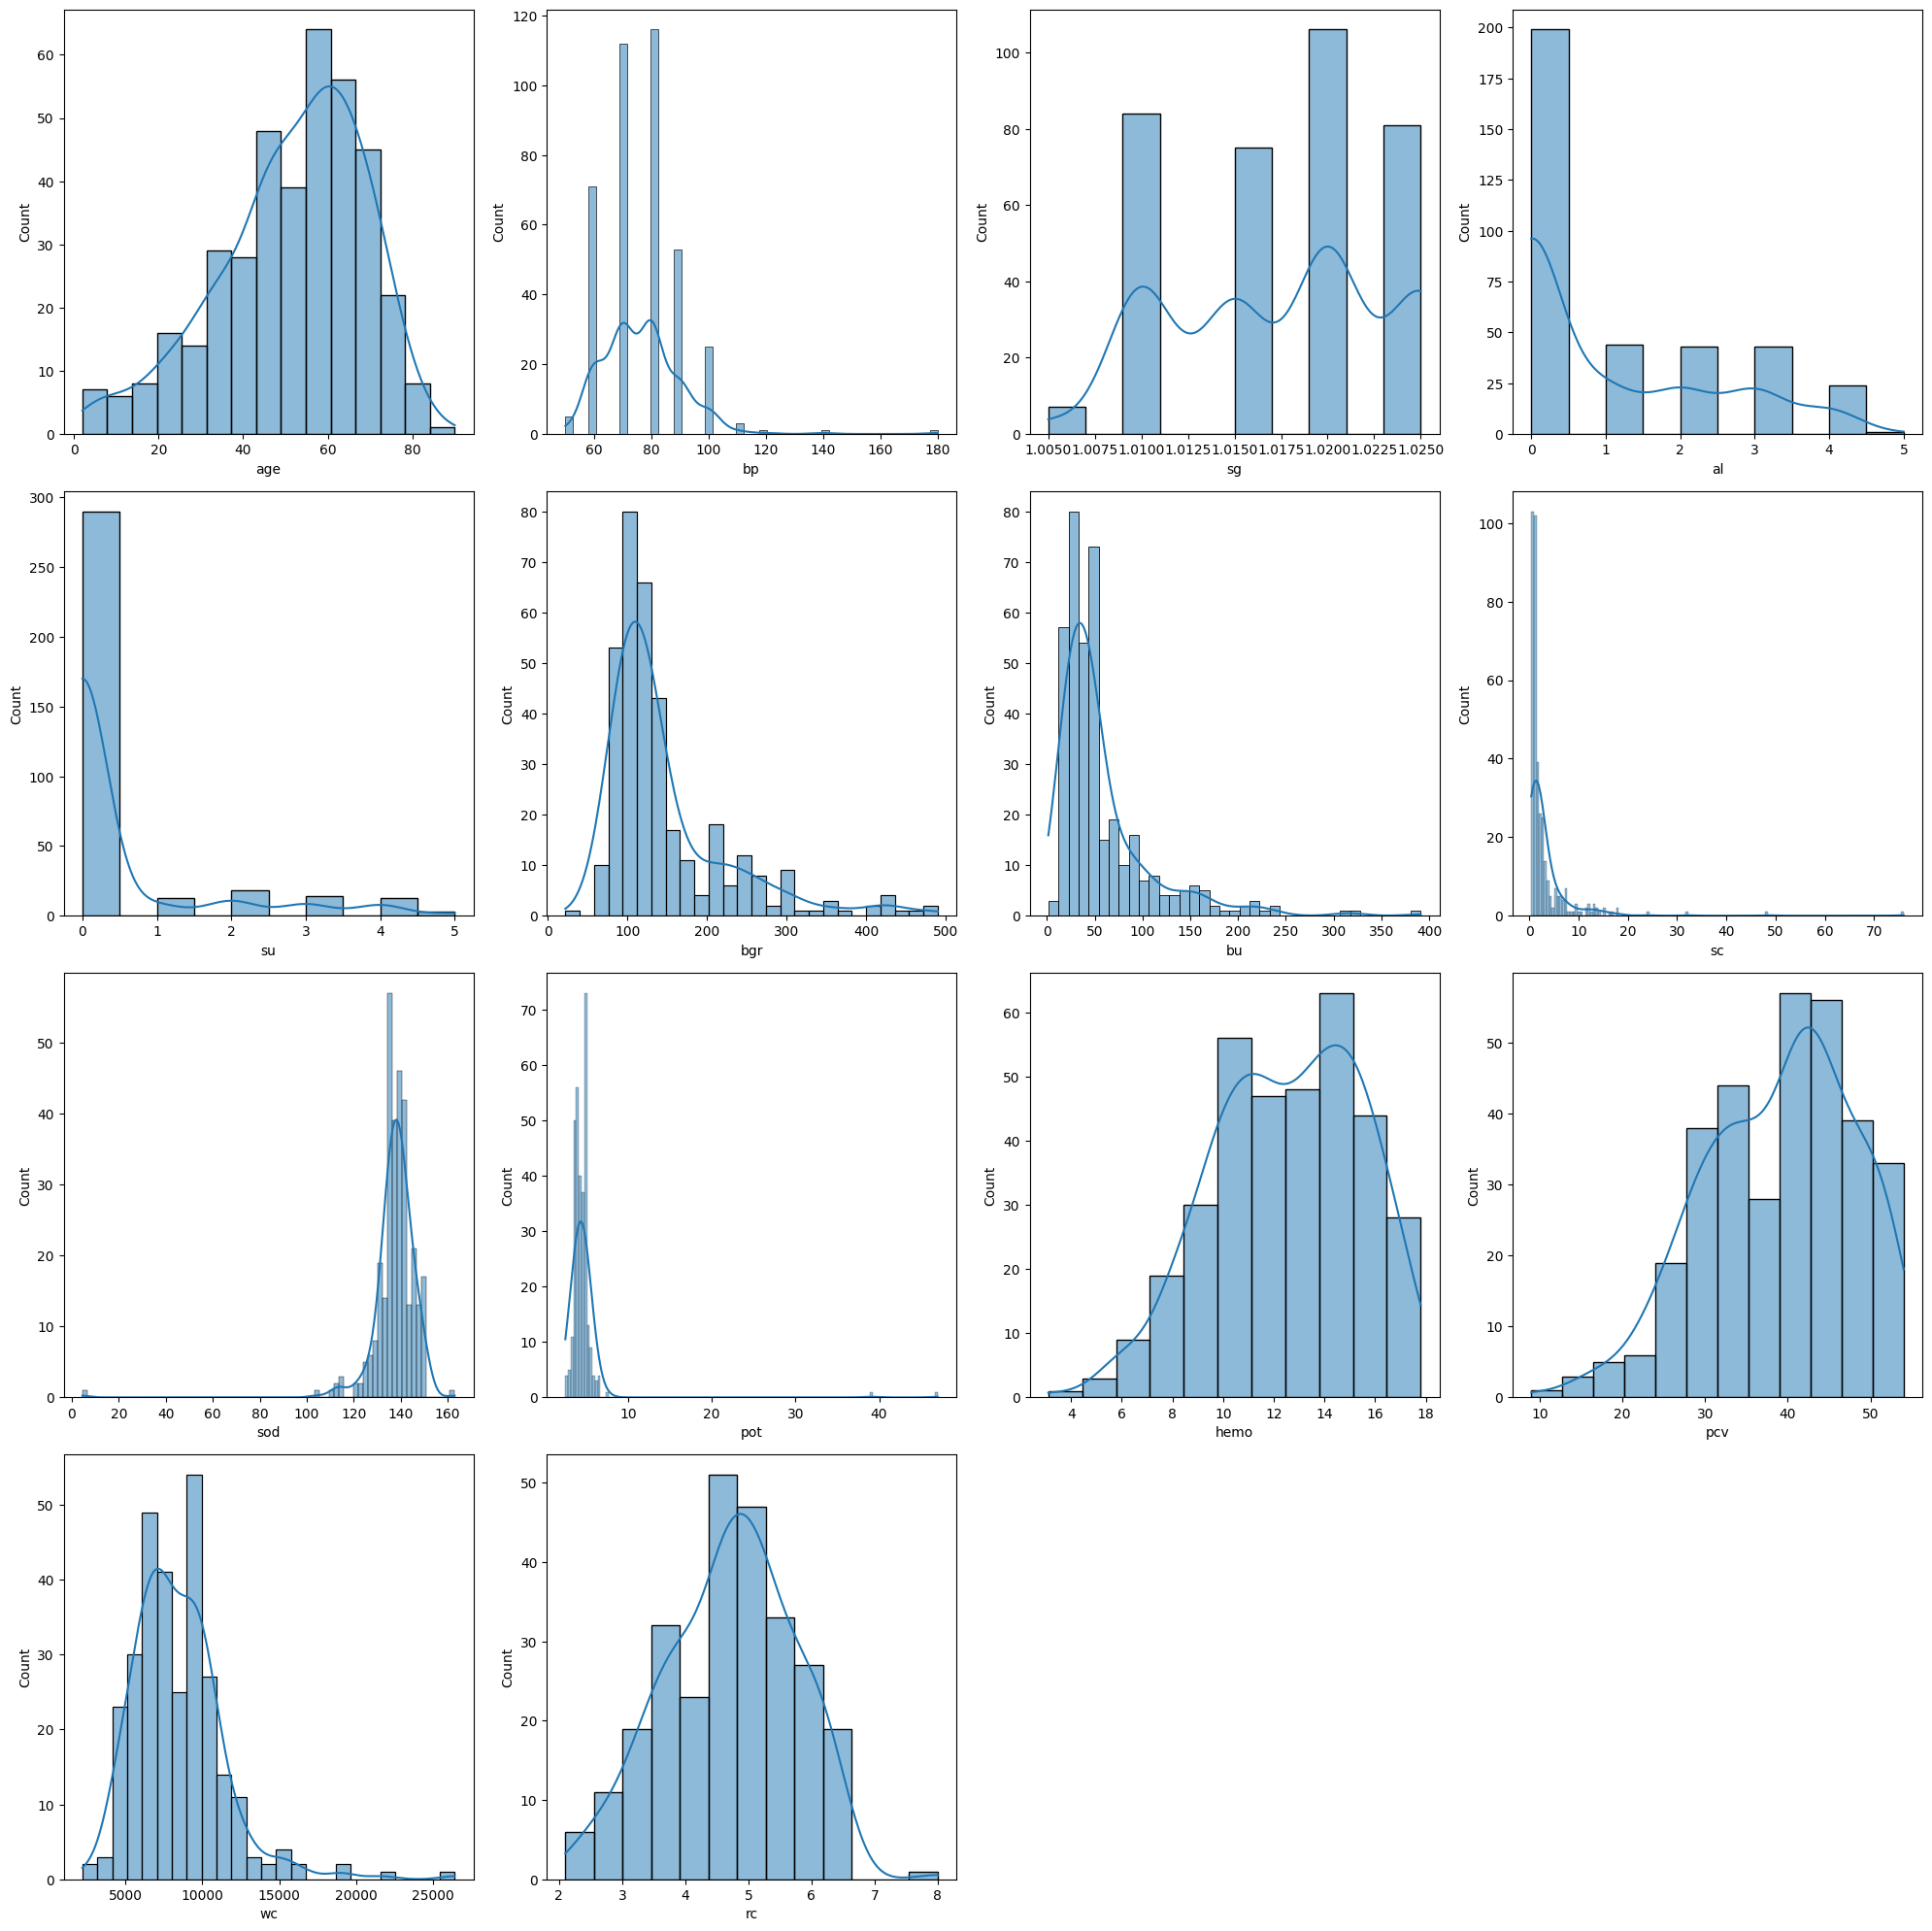

In [13]:
plt.figure(figsize = (20, 20))
i = 1
for col in numerical:
    if i <= len(numerical):
        ax = plt.subplot(4, 4, i)
        sns.histplot(data[col], kde=True)
        plt.xlabel(col)
    i += 1

plt.tight_layout()
plt.show()

In [14]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

Looking at the 'classification' column we realize that some values contain '\\t' which turns them into unwanted unique results. This seems to be the case for some other categorical variables as well.

In [ ]:
# remove '\t'
data['dm'].replace([' yes', '\tno', '\tyes'],['yes','no','yes'],inplace=True)
data['cad'].replace(['\tno'],['no'],inplace=True)
data['classification'].replace('ckd\t','ckd',inplace=True)
data.replace('\t?', np.nan, inplace=True)

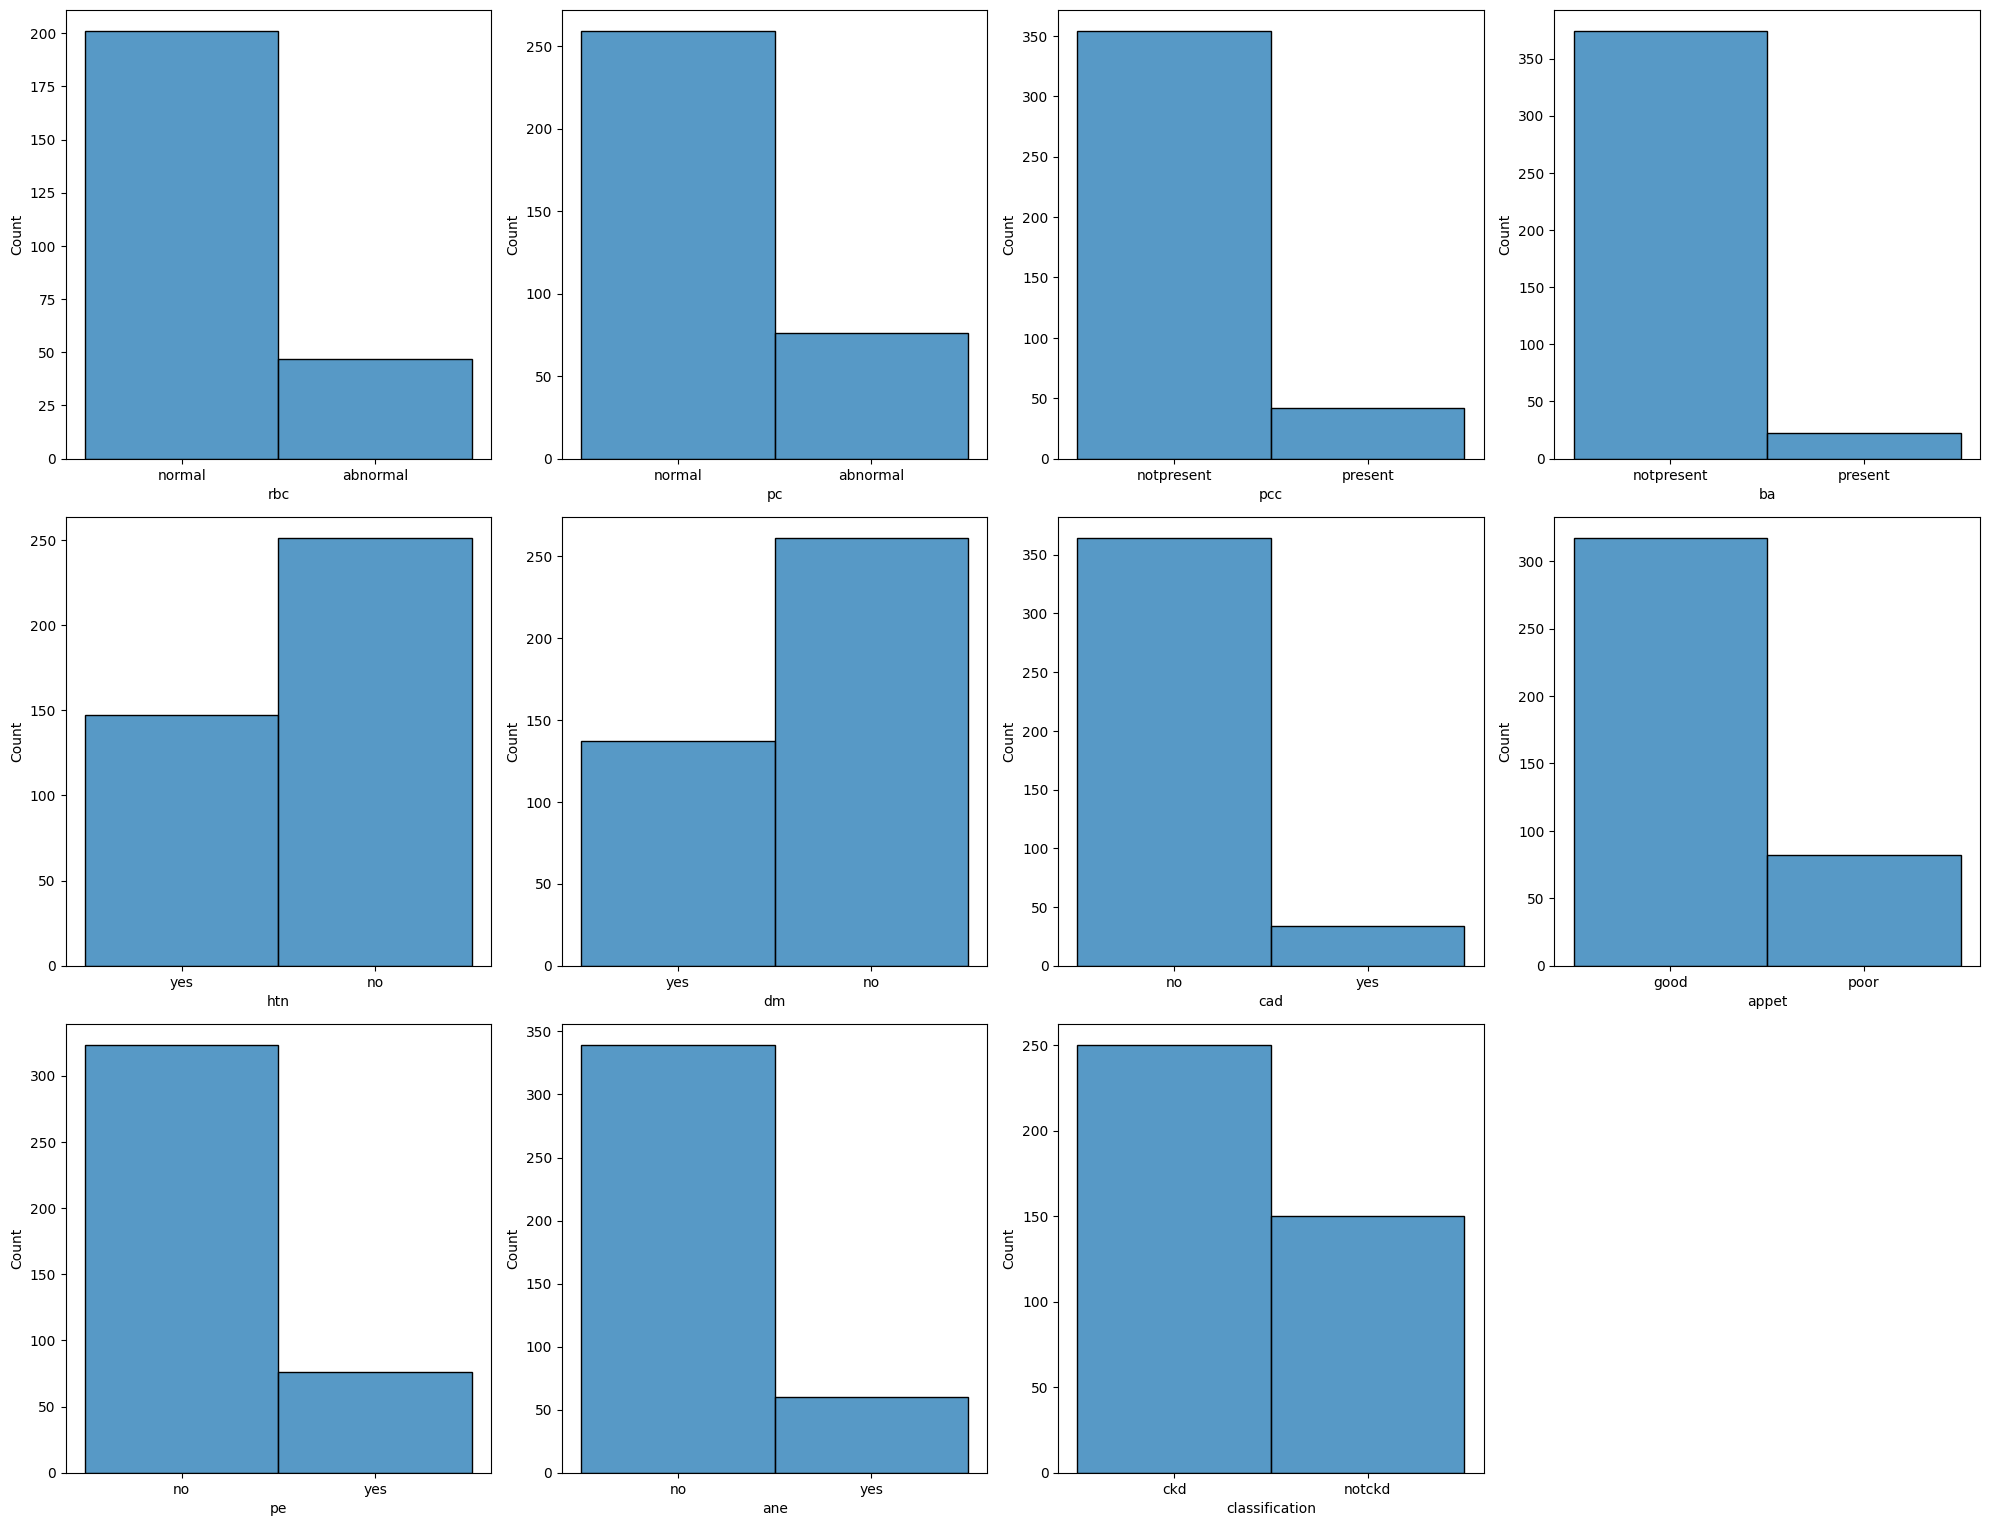

In [16]:
plt.figure(figsize = (20, 20))
i = 1
for col in categorical:
    if i <= len(categorical):
        ax = plt.subplot(4, 4, i)
        sns.histplot(data[col])
        plt.xlabel(col)
    i += 1

plt.tight_layout()
plt.show()

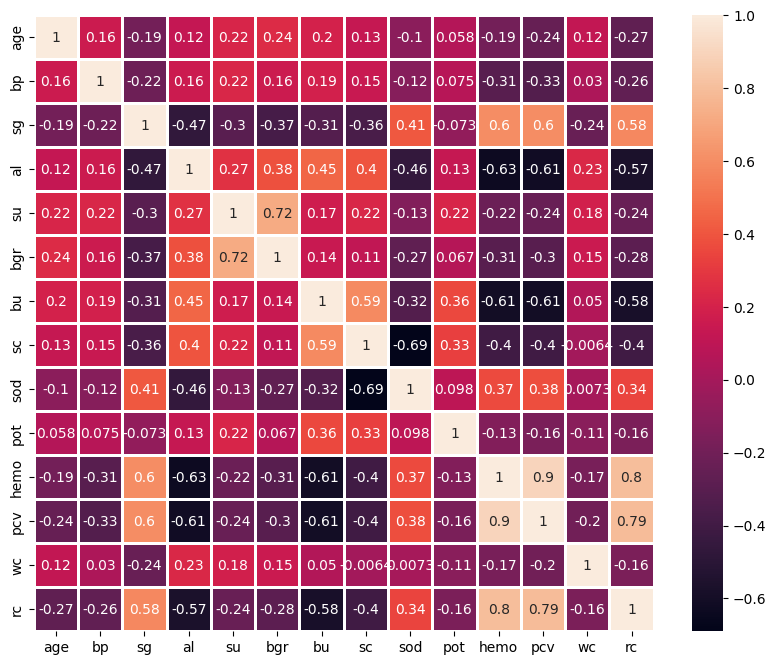

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[[col for col in numerical]].corr(), annot = True, linewidths = 2, )
plt.show()

In [18]:
# filling na values using mean/mode
data2 = data.copy()
for col in numerical:
    data2[col] = data2[col].fillna(data2[col].mean())

for col in categorical:
    data2[col] = data2[col].fillna(data2[col].mode()[0])
# data2.shape

In [19]:
# check if there's missing values in each column
# data2.isnull().sum()

In [ ]:
data2['classification'].replace(['ckd','notckd'],[1,0], inplace=True)

In [21]:
data2.classification.value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [22]:
for col in categorical:
    data2[col] = pd.Categorical(data2[col])

In [23]:
# scaling numerical var
scaler = StandardScaler()
data2[numerical] = scaler.fit_transform(data2[numerical])

We consider not dropping outliers because in the context of medical measurements, these values can be critical in identifying health issues or in this case detecting CKD.

In [37]:
# | echo: false
data2['classification'] = pd.to_numeric(data2['classification'])
cols = numerical.copy()
cols.append('classification')

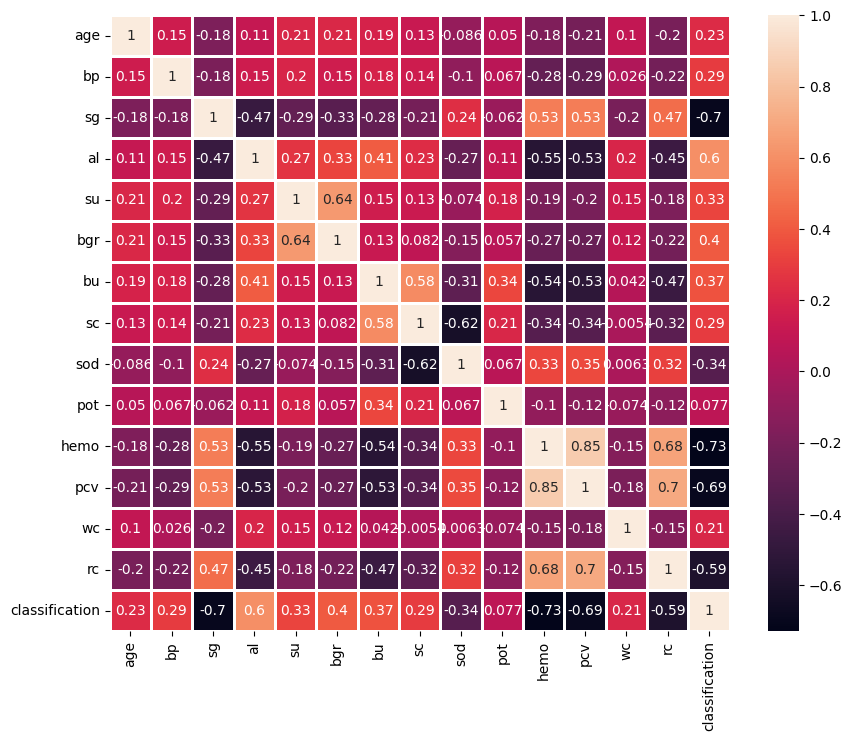

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(data2[[col for col in cols]].corr(), annot = True, linewidths = 2, )
plt.show()

There is strong negative correlation between potassium, packed cell volume, specific gravity and classification. Relatively significant postive correlation with albumin. This implies that these variables are likely to be important predictors. On the other hand, variables that are highly correlated to each other may suggest multicollinearity (eg. packed cell volume and red blood cell count).

### Potential subgroups

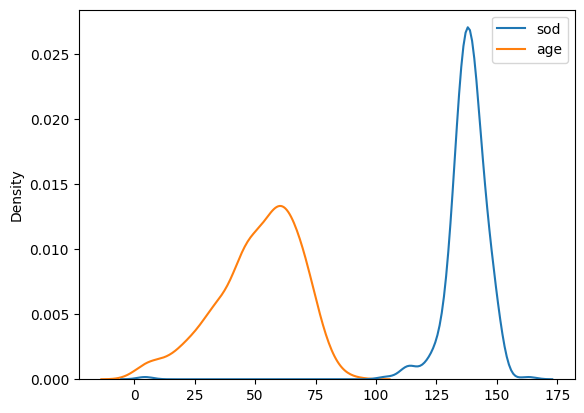

In [86]:
sns.kdeplot(data=data[['sod','age']])
plt.show();

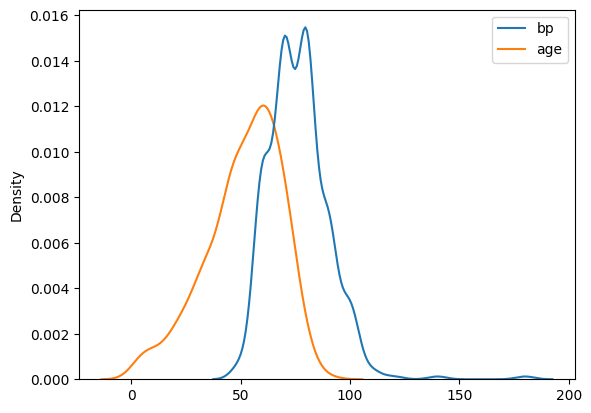

In [87]:
sns.kdeplot(data=data[['bp','age']])
plt.show();

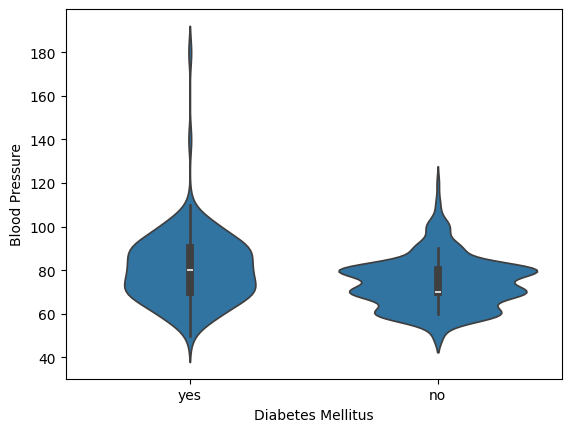

In [88]:
sns.violinplot(data=data, x='dm', y='bp')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Blood Pressure')
plt.show();

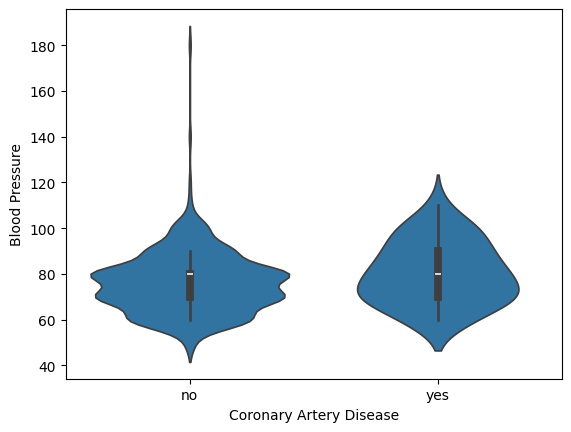

In [89]:
sns.violinplot(data=data, x='cad', y='bp')
plt.xlabel('Coronary Artery Disease')
plt.ylabel('Blood Pressure')
plt.show();

In [ ]:
# encoding labels
from sklearn.preprocessing import LabelEncoder
for col in categorical:
    data2[col] = LabelEncoder().fit_transform(data2[col])

In [ ]:
X = data2.drop(['classification'], axis=1)
y = data2.classification

### Data Splitting

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

### Classification
For this project, we are using k-Nearest Neighbours and Logistic Regression for classification. They are both easy to implement and highly interpretable algorithms, with LogReg being able to handle multiple features and large datasets, and kNN being robust to noises.

Their performances will be measured based on accuracy scores and confusion matrices.


### KNN

In [91]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 2,algorithm='brute')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [92]:
yk_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, knn.predict(x_test)))

0.975


In [93]:
print('Confusion Matrix : \n',confusion_matrix(y_test, yk_pred))
print('Accuracy: ',metrics.accuracy_score(y_test, knn.predict(x_test)))

Confusion Matrix : 
 [[45  0]
 [ 3 72]]
Accuracy:  0.975


Confusion matrix shows some false negatives.

We can try to improve the performance of KNN algorithm by choosing different number of K.

In [94]:
k_range = range(1, 8)
scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

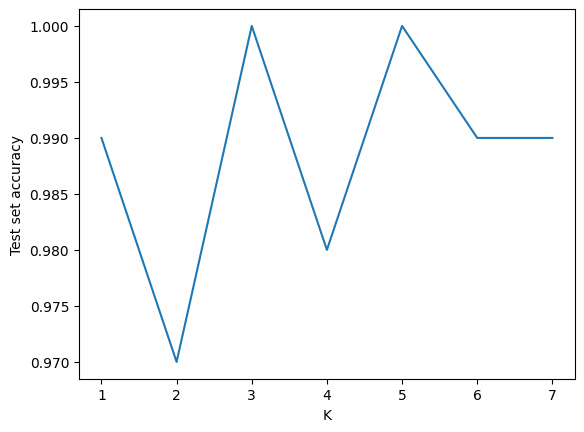

In [95]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

Let's choose optimal K=3 as it gives us the highest test accuracy score.

In [96]:
# refit knn
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3,algorithm='brute')
knn3.fit(x_train, y_train)
yk_pred3 = knn3.predict(x_test)

In [97]:
print('Confusion Matrix : \n',confusion_matrix(y_test, yk_pred3))
print('Accuracy: ',metrics.accuracy_score(y_test, knn3.predict(x_test)))

Confusion Matrix : 
 [[45  0]
 [ 0 75]]
Accuracy:  1.0


### Logistic Regression

In [98]:
reg = LogisticRegression(max_iter = 200)

In [99]:
reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [100]:
yr_pred = reg.predict(x_test)

In [101]:
pred_prob = reg.predict_proba(x_test)
df = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_test})
df['y_test_pred'] = df.prob.map(lambda x: 1 if x>0.5 else 0)
df.head(5)

,prob,y_test,y_test_pred
307,0.109940,0,0
25,0.961841,1,1
143,0.999975,1,1
217,0.998589,1,1
53,0.998530,1,1


In [102]:
cm = confusion_matrix(df.y_test, df.y_test_pred)
print('Confusion Matrix : \n', cm)
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[45  0]
 [ 0 75]]
Accuracy :  1.0


### Comparison

In [104]:
knn_acc = metrics.accuracy_score(y_test, knn.predict(x_test))
knn3_acc = metrics.accuracy_score(y_test, knn3.predict(x_test))
lg_acc = metrics.accuracy_score(y_test, reg.predict(x_test))

knn_acct = metrics.accuracy_score(y_train, knn.predict(x_train))
knn3_acct = metrics.accuracy_score(y_train, knn3.predict(x_train))
lg_acct = metrics.accuracy_score(y_train, reg.predict(x_train))

In [105]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'KNN (K=3)', 'Logistic Regression'],
    'Training Accuracy Score' : [knn_acct, knn3_acct, lg_acct],
    'Test Accuracy Score' : [knn_acc, knn3_acc, lg_acc]
})
models.sort_values(by = ['Test Accuracy Score','Training Accuracy Score'], ascending = False)

,Model,Training Accuracy Score,Test Accuracy Score
2,Logistic Regression,1.000000,1.000000
1,KNN (K=3),0.971429,1.000000
0,KNN,0.975000,0.991667


All the chosen classifiers perform with very high accuracy scores for the dataset with the lowest being KNN(K=2) at 0.975. The accuracy for KNN algorithm on training data tend to be lower than on test set but still show good results nonetheless. 

Their confusion matrices show that most classifications are correct, with the exceptions being KNN with 3 false negatives.

Overall, logistic regression seems to be the best option.

### Insight

In [ ]:
# significance of predictors
var = reg.coef_[0]
for var, sig in zip(X.columns, var):
    print(f'{var}: {sig}')

age: -0.11758862757535245
bp: 0.26096618432969365
sg: -1.9899691495355263
al: 1.4837382815450968
su: 0.521884374031793
rbc: -0.42567147514021453
pc: -0.2899817687939034
pcc: 0.06239930730438258
ba: 0.020878529924035643
bgr: 0.7302166830758979
bu: 0.19778150063292485
sc: 0.8959290982370719
sod: -0.46374034457240243
pot: -0.08681603815811495
hemo: -1.3858216761562454
pcv: -1.2088878024849234
wc: -0.060530742013370636
rc: -0.7986376612876621
htn: 0.9326092124334423
dm: 0.8456625926193778
cad: 0.032678174623960575
appet: 0.8806511359853826
pe: 0.6150415602515449
ane: 0.05113992749932986


Looking at the coefficients we can see that there are some predictors with relatively significant coefficient values. For example, within context negative coefficient for 'sp' -1.990 suggests that lower Specific Gravity points to increased likelihood of the target variable. On the other hand, positive number like 1.484 implies that higher Albumin level is associated with higher likelihood of CKD. There isn't much of a relationship with variables like Bacteria presence and Coronary Artery Disease. But there is a slight indication that as age increases, possibility of CKD decreases.

One of the challenges with healthcare data is that they can consist missing or inconsistenly-formatted values, noise, which may become an issue during analysis.

## Git Repository

[Assignment 6](https://github.com/LouiseV0/Stats3DA/tree/master/A6)

## References

---
nocite: |
  @*
---